# Analysing evaluation results for composite reward with accum waiting time

In [1]:
import os
import pandas as pd
import numpy as np

pd.set_option("display.max_columns", None)  # Show all columns
pd.set_option("display.max_rows", None)     # Show all rows
pd.set_option("display.max_colwidth", None) # Show full width of columns
pd.set_option("display.width", 1000)        # Set the total width of the terminal output

import sys 
sys.path.append("../")
from data_analysis_functions import generate_summary_df_from_csv, get_df_from_csv, get_trained_and_fixed_from_csv # type: ignore

In [2]:
# sys.path.remove("data_analysis_after_train")
TRAINED_CHECKPOINT_PATHS = ["reward_experiments/2x2grid/combined_reward_with_queue_length/EVALUATION/PPO_2024-05-06_11_39__alpha_0.45",
                            "reward_experiments/2x2grid/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-07_07_55__alpha_0.4", 
                            "reward_experiments/2x2grid/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-07_11_05__alpha_1/",
                            "reward_experiments/2x2grid/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-08_10_13__alpha_0.3/", 
                            "reward_experiments/2x2grid/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-08_15_41__alpha_0.35/", 
                            "reward_experiments/2x2grid/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-16_09_54__alpha_0/",
                            "reward_experiments/2x2grid/combined_reward_with_diff_accum_wait/EVALUATION/PPO_2024-05-16_11_27__alpha_0.2"]

TRAINED_CHECKPOINT_PATHS_ABS = [os.path.join("/Users/loveen/Desktop/Masters project/rl-multi-agent-traffic-nonexhaust-emissions-clean/", x) for x in TRAINED_CHECKPOINT_PATHS]

In [3]:
def concaten_summary_for_specific_seed(seed):
    '''
    Takes in a seed, and calls the generate summary dataframe. 
    '''

    fixed_tc_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[0], 
                                    eval_dir = "fixed_tc", 
                                    df_row_label = "fixed_tc",
                                    seed = seed)
    # trained_0_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
    #                               eval_dir = "trained", 
    #                               df_row_label = "alpha_0",
    #                               seed = seed)
    trained_0_4_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[1], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_4",
                                    seed = seed)
    trained_1_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[2], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_1",
                                    seed = seed)
    trained_0_3_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[3], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_3",
                                    seed = seed)
    trained_0_35_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[4], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_35",
                                    seed = seed)
    trained_0_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[5], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0",
                                    seed = seed)
    trained_0_2_df = generate_summary_df_from_csv(path_to_checkpoint_eval_data = TRAINED_CHECKPOINT_PATHS_ABS[6], 
                                    eval_dir = "trained", 
                                    df_row_label = "alpha_0_2",
                                    seed = seed)
    alpha_experiment_df = pd.concat([fixed_tc_df,
                                     trained_0_df,
                                     trained_0_2_df,
                                     trained_0_3_df,
                                     trained_0_4_df,
                                     trained_0_35_df, 
                                     trained_1_df], axis=0)
    return alpha_experiment_df

get dfs for all seeds, and concat

In [4]:
SUMO_SEEDS = [10, 15, 22, 31, 55, 39, 83, 49, 51, 74]
SUMO_SEEDS = [10, 22, 39, 31, 55]

alpha_dfs = [concaten_summary_for_specific_seed(seed) for seed in SUMO_SEEDS]

# Step 2: Concatenate them along the row axis
alpha_df_combined = pd.concat(alpha_dfs, axis=0, ignore_index=False)

alpha_df_combined

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
fixed_tc,17.799791,19.427774,60.617974,88998.956683,88978.900209,377.438422,6.265263,15.287334,0.272280,15.015054,6.576319,4.984019,11.6588,241.2870,14.415043,12.685126,11.6588,58294.0,277.5246
alpha_0,0.217415,1.375859,1.846089,1087.072730,1087.072730,1.892989,0.095051,15.287334,0.000000,15.287334,0.000000,0.801492,74.5494,182870.5416,1.355469,0.214646,74.5494,372747.0,66957.0000
alpha_0_2,15.146122,19.340048,144.661394,75730.608786,75729.131685,374.037466,3.503560,15.287334,0.287713,14.999621,3.136613,3.045414,30.5602,3231.6284,14.924478,11.040335,30.5602,152801.0,4500.4782
alpha_0_3,19.089741,21.612368,102.696778,95448.704322,95441.610564,467.094445,4.249170,15.287334,0.698813,14.588521,4.039843,2.418433,25.2678,1699.7398,16.905149,14.187026,25.2678,126339.0,2134.3146
alpha_0_4,15.527246,16.903367,44.637373,77636.232417,77626.874129,285.723829,9.607613,15.287334,4.924383,10.362951,9.648131,1.837672,2.7564,24.3676,11.849934,10.492009,2.7564,13782.0,27.7000
alpha_0_35,14.104939,15.399019,38.188123,70524.695312,70516.373639,237.129791,10.266508,15.287334,5.942174,9.345160,10.236763,1.358899,1.9458,16.7174,10.501901,9.292455,1.9458,9729.0,18.2412
alpha_1,20.300044,21.470376,48.895045,101500.217671,101489.695036,460.977033,9.438092,15.287334,5.212238,10.075096,9.456583,1.625998,1.8616,6.8626,15.210560,13.973154,1.8616,9308.0,10.1836
fixed_tc,17.045730,18.694077,58.923384,85228.649952,85220.847174,349.468510,6.332438,12.998603,0.000000,12.998603,6.752264,5.201730,11.1526,230.1994,13.879953,12.115704,11.1526,55763.0,262.1974
alpha_0,0.210617,1.373555,1.842663,1053.083742,1053.083742,1.886654,0.079940,12.998603,0.000000,12.998603,0.000000,0.564112,74.4318,182301.7148,1.373555,0.210617,74.4318,372159.0,66839.4000
alpha_0_2,14.726519,19.118181,148.664238,73632.593457,73631.452792,365.504858,3.307982,12.998603,0.000000,12.998603,2.899422,3.055867,31.6242,3440.3046,14.777341,10.843198,31.6242,158121.0,4935.7468


In [5]:
# Step 3: Compute the mean for each row
df_average_whole_experiment = alpha_df_combined.groupby(alpha_df_combined.index).mean()
df_average_whole_experiment

,sys_abs_accel_episode_mean,sys_abs_accel_episode_rms,sys_abs_accel_episode_var,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_abs_accel_episode_ms,sys_avg_speed_episode_mean,sys_avg_speed_episode_max,sys_avg_speed_episode_min,sys_avg_speed_episode_range,sys_avg_speed_episode_median,sys_avg_speed_episode_variance,sys_total_stopped_episode_mean,sys_avg_waiting_time_episode_mean,all_agents_abs_accel_episode_rms,all_agents_abs_accel_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time
alpha_0,0.211865,1.344044,1.765034,1059.326526,1059.326526,1.809579,0.090504,14.071065,0.000000,14.071065,0.000000,0.666069,74.36028,181953.14256,1.339966,0.211312,74.36028,371801.4,66767.88000
alpha_0_2,16.903895,21.356669,170.521992,84519.473381,84515.067029,461.436226,3.171729,14.071065,0.108461,13.962604,2.894512,2.767751,36.06808,3809.41364,16.790720,12.687006,36.06808,180340.4,5561.80448
alpha_0_3,19.053370,21.612383,104.123143,95266.847789,95257.544071,467.698672,4.209258,14.071065,0.678456,13.392609,3.968457,2.347308,25.75348,1803.61584,17.014749,14.264924,25.75348,128767.4,2247.09560
alpha_0_35,13.621316,14.850571,35.048295,68106.579882,68098.705777,220.698781,10.334879,14.355612,4.842010,9.513602,10.350170,1.442070,1.82360,15.73356,10.131950,8.946463,1.82360,9118.0,17.13324
alpha_0_4,15.135616,16.445679,41.414783,75678.081081,75670.300181,270.586595,9.581847,14.071065,3.809662,10.261403,9.592619,1.735140,2.68572,24.83328,11.485059,10.199004,2.68572,13428.6,28.14444
alpha_1,19.219903,20.362045,45.251538,96099.513728,96089.770423,415.104348,9.627616,14.220723,3.961270,10.259453,9.670316,1.688937,1.67592,6.19044,14.362867,13.157700,1.67592,8379.6,9.20240
fixed_tc,17.020372,18.626029,57.274211,85101.862194,85089.142727,347.225172,6.331344,14.071065,0.133200,13.937866,6.741029,5.078206,11.10484,228.63040,13.852297,12.118836,11.10484,55524.2,261.36132


## Columns of interest to compare across:

In [6]:
df_average_whole_experiment[['sys_abs_accel_episode_mean', 
                             'sys_abs_accel_episode_sum', 
                             "sys_abs_accel_episode_integral", 
                             'sys_avg_waiting_time_episode_mean',
                             "sys_total_stopped_episode_mean",
                             "sys_avg_speed_episode_mean",
                             "tot_agent_stopped_episode_mean",
                             "tot_agent_stopped_episode_sum",
                             "tot_agent_accum_wait_time",
                             "all_agents_abs_accel_episode_mean"]]

,sys_abs_accel_episode_mean,sys_abs_accel_episode_sum,sys_abs_accel_episode_integral,sys_avg_waiting_time_episode_mean,sys_total_stopped_episode_mean,sys_avg_speed_episode_mean,tot_agent_stopped_episode_mean,tot_agent_stopped_episode_sum,tot_agent_accum_wait_time,all_agents_abs_accel_episode_mean
alpha_0,0.211865,1059.326526,1059.326526,181953.14256,74.36028,0.090504,74.36028,371801.4,66767.88000,0.211312
alpha_0_2,16.903895,84519.473381,84515.067029,3809.41364,36.06808,3.171729,36.06808,180340.4,5561.80448,12.687006
alpha_0_3,19.053370,95266.847789,95257.544071,1803.61584,25.75348,4.209258,25.75348,128767.4,2247.09560,14.264924
alpha_0_35,13.621316,68106.579882,68098.705777,15.73356,1.82360,10.334879,1.82360,9118.0,17.13324,8.946463
alpha_0_4,15.135616,75678.081081,75670.300181,24.83328,2.68572,9.581847,2.68572,13428.6,28.14444,10.199004
alpha_1,19.219903,96099.513728,96089.770423,6.19044,1.67592,9.627616,1.67592,8379.6,9.20240,13.157700
fixed_tc,17.020372,85101.862194,85089.142727,228.63040,11.10484,6.331344,11.10484,55524.2,261.36132,12.118836


As you can see above, what we see is that -> 

<Axes: title={'center': 'sys_abs_accel_episode_mean'}>

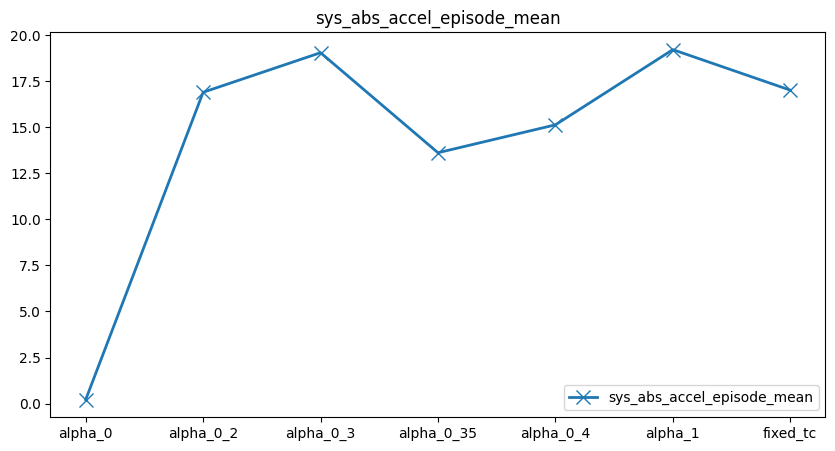

In [7]:
df_average_whole_experiment[["sys_abs_accel_episode_mean"]].plot(figsize=(10,5), 
                                                                        linewidth=2, 
                                                                        marker='x', 
                                                                        markersize=10, 
                                                                        title="sys_abs_accel_episode_mean")

<Axes: title={'center': 'sys_avg_waiting_time_episode_mean'}>

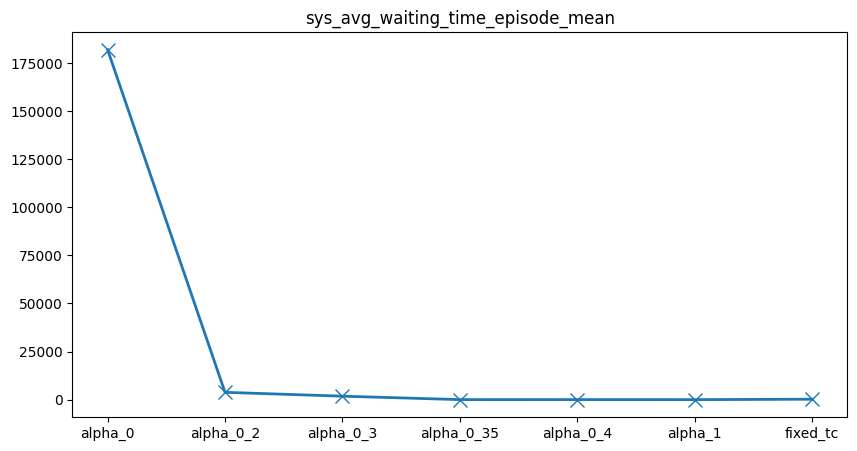

In [10]:
df_average_whole_experiment["sys_avg_waiting_time_episode_mean"].plot(figsize=(10,5), 
                                                                        linewidth=2, 
                                                                        marker='x', 
                                                                        markersize=10, 
                                                                        title="sys_avg_waiting_time_episode_mean")

<Axes: title={'center': 'sys_avg_waiting_time_episode_mean'}>

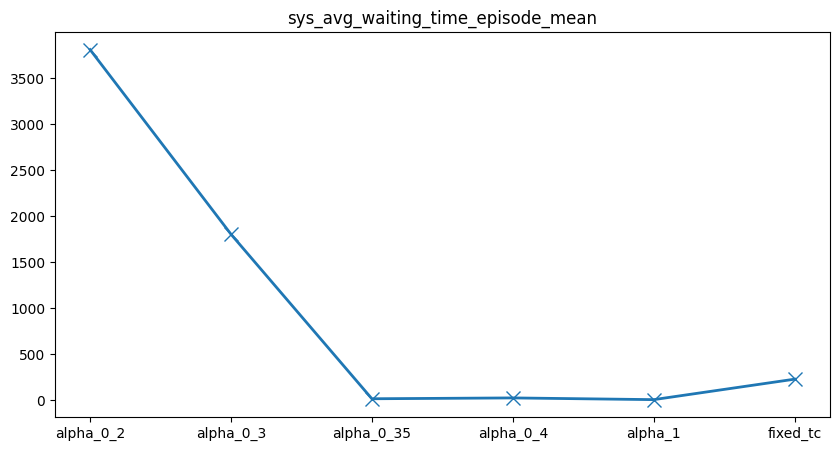

In [14]:
df_average_whole_experiment["sys_avg_waiting_time_episode_mean"][1:].plot(figsize=(10,5), 
                                                                        linewidth=2, 
                                                                        marker='x', 
                                                                        markersize=10, 
                                                                        title="sys_avg_waiting_time_episode_mean")

In [ ]:
import matplotlib.pyplot as plt

f = df_average_whole_experiment["sys_abs_accel_episode_mean"]

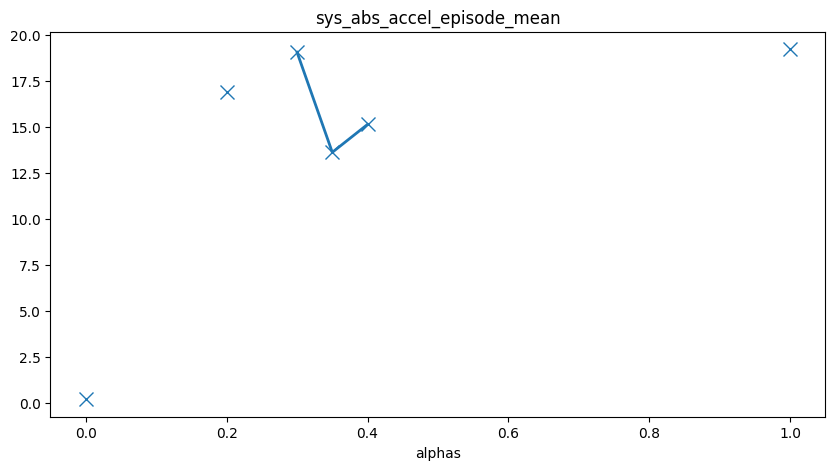

In [ ]:

plt.figure(figsize=(10,5))

data = [(0, f['alpha_0']),
        (0, None),
        (0., None),
        (0.2, f['alpha_0_2']),
        (0.25, None),
        (0.3, f['alpha_0_3']),
        (0.35, f['alpha_0_35']),
        (0.4, f['alpha_0_4']),
        (0.45, None),
        (0.5, None),
        (0.55, None),
        (0.6, None),
        (0.65, None),
        (0.7, None),
        (0.75, None),
        (0.8, None),
        (0.85, None),
        (0.9, None),
        (0.95, None),
        (1, f['alpha_1']),
        ]
x = [tup[0] for tup in data]
y = [tup[1] for tup in data]

plt.plot(x,y, 
         linewidth=2,
         marker='x',
         markersize=10)
plt.title('sys_abs_accel_episode_mean')
plt.xlabel('alphas')

plt.show()

<Axes: title={'center': 'sys_abs_accel_episode_sum'}>

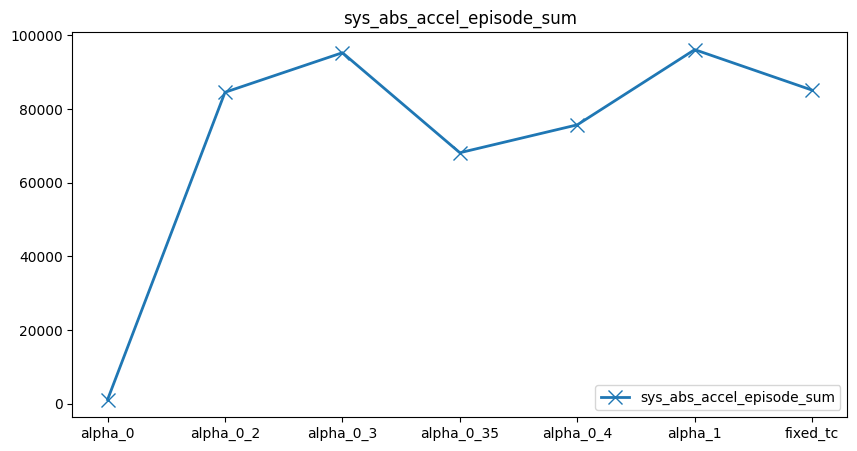

In [ ]:
df_average_whole_experiment[["sys_abs_accel_episode_sum"]].plot(figsize=(10,5), 
                                                                        linewidth=2, 
                                                                        marker='x', 
                                                                        markersize=10, 
                                                                        title="sys_abs_accel_episode_sum")

In [ ]:
'sys_avg_waiting_time_episode_mean',

('sys_avg_waiting_time_episode_mean',)